<a href="https://colab.research.google.com/github/Jefferson-Luis/maisModal/blob/main/Modulo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science com Python: Módulo 2 - Obtenção e Armazenamento de Dados -
Nesse módulo iremos passar pelo primeiro ponto do pipeline de dados, mostrando com exemplos práticos os diferentes tipos de dados e as diferentes formas de obtenção e armazenamento de dados.

### Modulo 2 - Obtenção de dados 
## O objetivo deste módulo é apresentar as diferentes fontes de dados de onde podemos obter informações do mercado financeiro utilizando Python

# 1. Bibliotecas

In [1]:
# manipulação de dados
!pip install pandas numpy   
!pip install datetime

# potar graficos
!pip install matplotlib

# fonte de dados ligados API
!pip install yfinance
!pip install quandl 

     |████████████████████████████████| 51 kB 585 kB/s 
     |████████████████████████████████| 251 kB 18.8 MB/s 
     |████████████████████████████████| 6.4 MB 30.8 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt

# Importação de dados financeiros
import yfinance as yf
import quandl

### 2. Obteção de dados via arquivos
* Durante sua jornada no mundo dos dados você precisará trabalhar com diferentes tipos de arquivos e essa seção é dedicada para importação desses arquivos para o ambiente de análise em Python

In [4]:

ibov = pd.read_csv('/content/sample_data/Bovespa.csv')

In [ ]:
# Mostrar os cinco primeiros registros do arquivo
ibov.head()

,Date,ABCB4,BBAS3,BBDC4,BPAN4,BTOW3,CGAS3,CMIG4,CSNA3,CYRE3,...,POMO4,QGEP3,RAPT4,SAPR4,SBSP3,SUZB5,TUPY3,USIM5,VALE5,WEGE3
0,6/5/2012,5.778904,13.193346,14.825962,NaN,4.67417,21.089613,16.403233,9.799454,13.011072,...,3.559332,7.938090,6.136378,4.945431,19.482090,4.228104,18.623053,7.724799,28.628716,6.314218
1,6/6/2012,5.784656,13.474055,15.421063,NaN,4.95184,21.367132,17.082111,9.838496,13.979592,...,3.727821,8.013066,6.316431,4.918369,19.842842,4.291890,18.852964,7.456715,29.472841,6.454251
2,6/8/2012,5.836405,13.488092,15.457347,NaN,5.08142,22.088638,17.082111,9.799454,14.025277,...,3.694127,7.825626,6.338035,5.256635,19.926100,4.437686,18.535686,7.635437,29.727674,6.368317
3,6/11/2012,5.922663,13.614412,15.628112,NaN,5.09993,22.088638,17.120369,9.705755,13.723758,...,3.753094,7.413257,6.482082,5.195747,20.203676,4.237216,17.629826,7.883664,29.377279,6.368317
4,6/12/2012,5.876658,13.614412,15.886813,NaN,5.34984,22.088638,17.689350,9.736986,13.632388,...,3.799433,7.413257,6.482082,5.202512,20.739265,4.146093,17.933311,7.754586,30.038250,6.365140


In [5]:
# Caso você possua os arquivos em uma pasta, você pode determinar seu diretório :

# ibov = pd.read_csv('c:\\Users\\...\\Bovespa.csv')

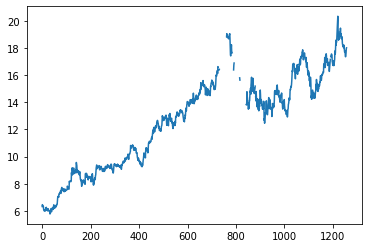

In [6]:
ibov.WEGE3.plot();

# 2.2. Arquivo .txt

In [7]:
# Abrir o arquivo ' WDO_mt5.txt' que contém uma amostra de vários pregões do WDO  (minidólar) no timeframe de 1 minuto

data = pd.read_csv('/content/sample_data/WDO_MT5_sample.txt')

In [8]:
data.head()

,time,time.1,open,high,low,close,tick_volume,spread,real_volume
0,2021-11-08 11:59:00,2021-11-08 11:59:00,5692.411,5692.922,5690.878,5691.900,2140,1,6413
1,2021-11-08 12:00:00,2021-11-08 12:00:00,5691.900,5693.943,5691.389,5693.943,1547,1,5209
2,2021-11-08 12:01:00,2021-11-08 12:01:00,5693.432,5693.943,5692.411,5693.943,1146,1,4500
3,2021-11-08 12:02:00,2021-11-08 12:02:00,5693.943,5693.943,5692.411,5693.943,685,1,2227
4,2021-11-08 12:03:00,2021-11-08 12:03:00,5693.432,5693.943,5691.900,5691.900,922,1,3612


In [9]:
# alterando para formato de tempo , para trabalhar com séries históricas.

data['time'] = pd.to_datetime(data['time'])

# alterando o index para data
data.index = data['time']

# ver o resultado da transformação
data.head()

,time,time.1,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,,,
2021-11-08 11:59:00,2021-11-08 11:59:00,2021-11-08 11:59:00,5692.411,5692.922,5690.878,5691.900,2140,1,6413
2021-11-08 12:00:00,2021-11-08 12:00:00,2021-11-08 12:00:00,5691.900,5693.943,5691.389,5693.943,1547,1,5209
2021-11-08 12:01:00,2021-11-08 12:01:00,2021-11-08 12:01:00,5693.432,5693.943,5692.411,5693.943,1146,1,4500
2021-11-08 12:02:00,2021-11-08 12:02:00,2021-11-08 12:02:00,5693.943,5693.943,5692.411,5693.943,685,1,2227
2021-11-08 12:03:00,2021-11-08 12:03:00,2021-11-08 12:03:00,5693.432,5693.943,5691.900,5691.900,922,1,3612


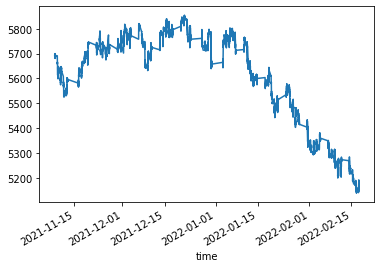

In [10]:
# Gerando um gráfico do fechamento 

data.close.plot();

In [11]:
# Verificar o nome das colunas
# fazer uma lista de nome das colunas

lista = data.columns

lista


Index(['time', 'time.1', 'open', 'high', 'low', 'close', 'tick_volume',
       'spread', 'real_volume'],
      dtype='object')

In [12]:
# Verifica as dimensões do dataframe

data.shape

(40000, 9)

In [13]:
# Verifica os tipos de dados por coluna
data.dtypes

time           datetime64[ns]
time.1                 object
open                  float64
high                  float64
low                   float64
close                 float64
tick_volume             int64
spread                  int64
real_volume             int64
dtype: object

In [14]:
# Ao valor máximo da coluna

data.close.max()

5854.552

In [15]:
# valor.mínimo da coluna

data.close.min()

5137.5

In [16]:
data.high.min()

5139.5

In [17]:
# Valor médio da coluna

data.close.mean()

5605.071517374926

In [18]:
# valor da mediana

data.close.median()

5674.02

In [19]:
# VAlor da moda

data.close.mode()

0    5725.105
dtype: float64

In [20]:
# VAlor do desvio padrão

data.close.std()

187.79991661149765

In [21]:
# valor da variância
data.close.var()

35268.80867928547

In [22]:
# calcula a variação do valor corrente do valor anterior

retornos = data.close.pct_change()
retornos

time
2021-11-08 11:59:00         NaN
2021-11-08 12:00:00    0.000359
2021-11-08 12:01:00    0.000000
2021-11-08 12:02:00    0.000000
2021-11-08 12:03:00   -0.000359
                         ...   
2022-02-17 13:51:00    0.000000
2022-02-17 13:52:00   -0.000097
2022-02-17 13:53:00   -0.000097
2022-02-17 13:54:00    0.000000
2022-02-17 13:55:00    0.000097
Name: close, Length: 40000, dtype: float64

In [23]:
# calcular a volatilidade
# Desvio padrão dos retornos
retornos.std()

0.00038607281252826017

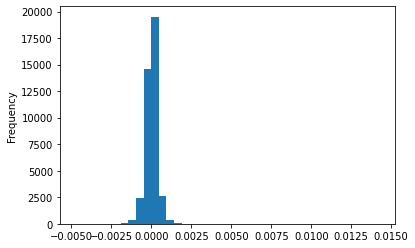

In [24]:
# calculando histograma 
# do fechamento do dolar futuro 

retornos.plot.hist(bins=40);

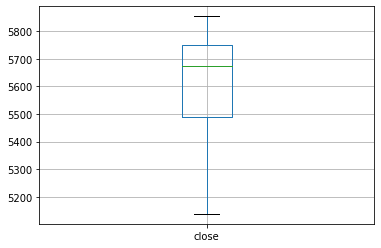

In [25]:
# mostrando os valores maximo e minimo 
# primeiro, segundo e terceiro quartil 

data.boxplot(column ='close');

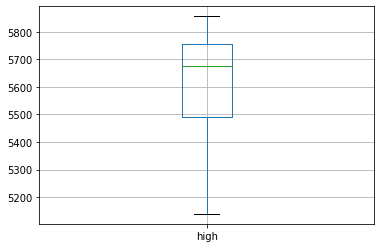

In [26]:
data.boxplot(column='high');

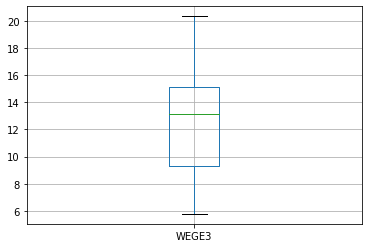

In [27]:
ibov.boxplot(column='WEGE3');

In [28]:
# fazer a correlação entre os valores 

ibov.corr()

,ABCB4,BBAS3,BBDC4,BPAN4,BTOW3,CGAS3,CMIG4,CSNA3,CYRE3,ELET3,...,POMO4,QGEP3,RAPT4,SAPR4,SBSP3,SUZB5,TUPY3,USIM5,VALE5,WEGE3
ABCB4,1.000000,0.802466,0.880064,0.180851,-0.167556,0.911855,-0.342822,0.347341,-0.133787,0.753930,...,-0.222426,-0.409633,-0.183966,0.846752,0.814047,0.360710,-0.578209,-0.389448,0.043743,0.602785
BBAS3,0.802466,1.000000,0.868918,0.266910,0.245779,0.689391,-0.048224,0.400193,-0.003426,0.589273,...,-0.191606,-0.189942,-0.101159,0.744618,0.507432,0.280796,-0.451727,-0.140659,0.223351,0.578229
BBDC4,0.880064,0.868918,1.000000,0.158674,0.119928,0.833946,-0.265528,0.304357,-0.234965,0.722583,...,-0.371329,-0.472693,-0.324127,0.720451,0.603517,0.407412,-0.654117,-0.452486,-0.054966,0.740246
BPAN4,0.180851,0.266910,0.158674,1.000000,0.429124,-0.046854,0.521156,-0.109402,0.415004,-0.203811,...,0.414433,0.461860,0.432300,0.176138,-0.109132,-0.197035,0.295033,0.396233,0.302457,-0.032979
BTOW3,-0.167556,0.245779,0.119928,0.429124,1.000000,-0.121103,0.236786,-0.007519,-0.143738,-0.286010,...,-0.125243,0.014232,-0.085849,-0.295866,-0.453984,0.064568,-0.073941,0.079001,-0.112585,0.264289
CGAS3,0.911855,0.689391,0.833946,-0.046854,-0.121103,1.000000,-0.462031,0.398764,-0.223291,0.741943,...,-0.233814,-0.459389,-0.209321,0.708664,0.771538,0.373223,-0.671312,-0.378275,-0.091518,0.628179
CMIG4,-0.342822,-0.048224,-0.265528,0.521156,0.236786,-0.462031,1.000000,0.174453,0.643327,-0.173920,...,0.548577,0.622308,0.616658,-0.066249,-0.199402,-0.794546,0.526795,0.592322,0.646578,-0.607624
CSNA3,0.347341,0.400193,0.304357,-0.109402,-0.007519,0.398764,0.174453,1.000000,0.257917,0.500640,...,0.160316,0.045911,0.216834,0.440101,0.507698,-0.260995,-0.143564,0.316540,0.447632,-0.093880
CYRE3,-0.133787,-0.003426,-0.234965,0.415004,-0.143738,-0.223291,0.643327,0.257917,1.000000,-0.197302,...,0.884056,0.876437,0.914417,0.154702,0.124696,-0.778160,0.640769,0.839087,0.826610,-0.715498
ELET3,0.753930,0.589273,0.722583,-0.203811,-0.286010,0.741943,-0.173920,0.500640,-0.197302,1.000000,...,-0.318211,-0.424422,-0.292154,0.781167,0.747866,0.178372,-0.534018,-0.383220,0.050994,0.414525


In [29]:
data.corr()

,open,high,low,close,tick_volume,spread,real_volume
open,1.000000,0.999970,0.999966,0.999940,-0.050395,0.202275,-0.069945
high,0.999970,1.000000,0.999957,0.999971,-0.047058,0.202227,-0.066657
low,0.999966,0.999957,1.000000,0.999972,-0.054499,0.202279,-0.074040
close,0.999940,0.999971,0.999972,1.000000,-0.050909,0.202251,-0.070496
tick_volume,-0.050395,-0.047058,-0.054499,-0.050909,1.000000,0.032941,0.968035
spread,0.202275,0.202227,0.202279,0.202251,0.032941,1.000000,-0.029410
real_volume,-0.069945,-0.066657,-0.074040,-0.070496,0.968035,-0.029410,1.000000


In [30]:
# co-variancia dos valores absolutos

ibov.cov()

,ABCB4,BBAS3,BBDC4,BPAN4,BTOW3,CGAS3,CMIG4,CSNA3,CYRE3,ELET3,...,POMO4,QGEP3,RAPT4,SAPR4,SBSP3,SUZB5,TUPY3,USIM5,VALE5,WEGE3
ABCB4,10.271072,12.611325,11.668475,0.235529,-4.033284,18.994346,-3.662055,2.589336,-1.116955,13.884716,...,-0.974866,-3.379814,-1.317272,6.737371,12.522596,4.015163,-5.791821,-4.476698,0.978392,6.772902
BBAS3,12.611325,23.773050,17.805082,0.516620,8.961274,22.158247,-0.781352,4.511088,-0.043128,16.439212,...,-1.257349,-2.377802,-1.091136,8.977416,11.789760,4.708080,-6.892524,-2.463682,7.565075,9.828311
BBDC4,11.668475,17.805082,17.101770,0.228731,3.773004,22.423683,-3.680327,2.957823,-2.557094,17.338544,...,-2.099132,-5.076324,-2.994986,7.438428,12.103834,5.905107,-8.579059,-6.775339,-1.602452,10.831139
BPAN4,0.235529,0.516620,0.228731,0.112181,0.782783,-0.118752,0.372574,-0.100023,0.236478,-0.475908,...,0.069539,0.176695,0.134993,0.195753,-0.227318,-0.146424,0.208830,0.183023,0.700284,-0.018213
BTOW3,-4.033284,8.961274,3.773004,0.782783,56.200144,-5.983502,5.800448,-0.130351,-2.783856,-12.253394,...,-1.262712,0.273884,-1.423394,-5.448687,-16.188770,1.661354,-1.733537,2.092300,-5.782119,6.900139
CGAS3,18.994346,22.158247,22.423683,-0.118752,-5.983502,42.245572,-10.111171,6.076799,-3.812713,27.953787,...,-2.081168,-7.754800,-3.043880,11.484368,24.278430,8.489807,-13.749432,-8.888785,-4.185761,14.446295
CMIG4,-3.662055,-0.781352,-3.680327,0.372574,5.800448,-10.111171,10.695664,1.326328,5.501482,-3.312128,...,2.409730,5.305614,4.454876,-0.539745,-3.096109,-8.751435,5.501547,6.811792,14.410408,-6.989148
CSNA3,2.589336,4.511088,2.957823,-0.100023,-0.130351,6.076799,1.326328,5.362635,1.543405,6.623657,...,0.499617,0.272504,1.110963,2.526363,5.598775,-2.074551,-1.012929,2.545824,6.974576,-0.757737
CYRE3,-1.116955,-0.043128,-2.557094,0.236478,-2.783856,-3.812713,5.501482,1.543405,6.700268,-2.917903,...,3.079392,5.811081,5.235374,0.990984,1.532369,-6.873983,5.096128,7.631245,14.545390,-6.440239
ELET3,13.884716,16.439212,17.338544,-0.475908,-12.253394,27.953787,-3.312128,6.623657,-2.917903,32.665558,...,-2.448202,-6.223431,-3.693890,11.075234,20.384611,3.507568,-9.538762,-7.880889,2.024350,8.274346


# 3. Obtenção via Biblioteca
### Como exemplo, vamos utilizar a função "download()" da biblioteca "yfinance" que nos possibilita extrair dados de ações e de vários outros tipos de ativos

In [35]:
# Extração de um ativo PETR4
#  site yahoofinance (ação  , inicio , final , periodo (d,m,ano)
yf.download('PETR4.SA', start='2022-02-01', end='2022-02-18', period="1d")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,32.349998,33.320000,31.950001,33.000000,30.164644,57315200
2022-02-02,33.410000,33.490002,32.360001,32.520000,29.725887,36271700
2022-02-03,32.349998,32.919998,31.620001,32.070000,29.314550,51087800
2022-02-04,32.410000,33.230000,31.879999,32.630001,29.826435,59346800
2022-02-07,32.549999,32.779999,32.130001,32.150002,29.387678,48868100
2022-02-08,31.900000,31.950001,31.260000,31.830000,29.095171,62590000
2022-02-09,31.740000,32.689999,31.650000,31.950001,29.204861,50960500
2022-02-10,32.299999,32.900002,31.940001,32.439999,29.652758,49534600
2022-02-11,32.770000,33.910000,32.630001,33.759998,30.859344,88013400


In [36]:
# extração das loja Renner

lren = yf.download('LREN3.SA', start ='2017-01-01', end='2021-07-20')

[*********************100%***********************]  1 of 1 completed


In [37]:
# exibindo o valor 

lren.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,18.775900,19.013674,18.702108,18.972677,17.484581,676417
2017-01-03,19.103865,19.677799,18.808697,19.554813,18.021063,2976064
2017-01-04,19.636805,19.833582,19.177654,19.382631,17.862389,2671030
2017-01-05,19.464622,19.587610,19.161257,19.202253,17.696156,3587596
2017-01-06,19.202253,19.202253,18.808697,18.980877,17.492142,2139141


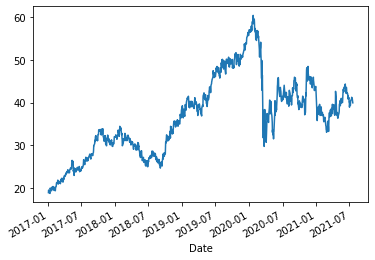

In [38]:
# Fazendo o plot da loja Rener

lren.Close.plot();

In [39]:
# Criando novo objeto brml3

brml3 = yf.Ticker('BRML3.SA')

In [40]:
# vejamos o tipo
# note que o objeto não é mais do tipo dataframe

type(brml3)

yfinance.ticker.Ticker

In [41]:
# pegando informações da brml3

brml3.info

{'52WeekChange': -0.20775622,
 'SandP52WeekChange': -0.070451856,
 'address1': 'Av. Borges de Medeiros, 633',
 'address2': '1º andar Leblon',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 8.61,
 'askSize': 0,
 'averageDailyVolume10Day': 15317770,
 'averageVolume': 15465266,
 'averageVolume10days': 15317770,
 'beta': 0.7174,
 'beta3Year': None,
 'bid': 8.52,
 'bidSize': 0,
 'bookValue': 13.093,
 'category': None,
 'circulatingSupply': None,
 'city': 'Rio De Janeiro',
 'companyOfficers': [],
 'country': 'Brazil',
 'currency': 'BRL',
 'currentPrice': 8.58,
 'currentRatio': 1.849,
 'dateShortInterest': None,
 'dayHigh': 8.73,
 'dayLow': 8.46,
 'debtToEquity': 34.982,
 'dividendRate': 0.05,
 'dividendYield': 0.0062,
 'earningsGrowth': 0.257,
 'earningsQuarterlyGrowth': 0.275,
 'ebitda': 761046016,
 'ebitdaMargins': 0.63474,
 'enterpriseToEbitda': 15.123,
 'enterpriseToRevenue': 9.6,
 'enterpriseValue': 11509678080,
 'exDividendDate': 1651449

In [42]:
# Visualizar os dividendos pagos
# Açõs relacionadas no histórico de dividendos e splits
brml3.actions

,Dividends,Stock Splits
Date,,
2010-05-03,0.081020,0.00
2010-05-04,0.081619,0.00
2010-09-24,0.000000,2.00
2011-05-02,0.110514,0.00
2012-04-25,0.100774,0.00
2013-05-02,0.315383,0.00
2014-05-02,0.210383,0.00
2014-12-04,0.103443,0.00
2015-05-04,0.306114,0.00


In [43]:
# visualizando o valor pago de dividendos sobre o valor da ação 
# Taxa de dividendos 

brml3.info['dividendRate']

0.05

In [44]:
# Preço / Lucro

brml3.info['forwardPE']

12.434783

In [45]:
# MarketCap
# pega o numero de ações e multiplica pelo preço atual

brml3.info['marketCap']


7106590720

In [46]:
# Média dos volumes transacionados nos últimos 10 dias

brml3.info['averageDailyVolume10Day']


15317770

In [47]:
# Investidores Institucionais

brml3.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"New World Fund, Inc.",56754185,2022-01-30,0.0685,546542801
1,Vanguard International Stock Index-Emerging Ma...,12068880,2022-01-30,0.0146,116223314
2,Vanguard International Stock Index-Total Intl ...,10850692,2022-01-30,0.0131,104492163
3,iShares Core MSCI Emerging Markets ETF,6650472,2022-02-27,0.0080,62580941
4,Emerging Markets Growth Fund,6080839,2021-12-30,0.0073,50531772
5,American Fds Developing World Growth & Income Fd,5124793,2022-02-27,0.0062,48224302
6,American Funds Insurance Ser-New World Fund,4194387,2021-12-30,0.0051,34855355
7,Vanguard Global ex U.S. Real Estate Index Fund,4099453,2022-01-30,0.0049,39477732
8,DFA Emerging Markets Core Equity Portfolio,3685040,2022-01-30,0.0044,35486935
9,DFA Emerging Markets Small Cap Series,3040792,2022-01-30,0.0037,29282826


In [48]:
# Resultados trimestrais

brml3.quarterly_earnings

,Revenue,Earnings
Quarter,,
2Q2021,239239000,-112997000
3Q2021,290490000,57149000
4Q2021,335333000,186276000
1Q2022,333927000,72104000


In [49]:
# Calendário de resultados

brml3.calendar


,Value
Earnings Date,2022-08-11 19:00:00
Earnings Average,None
Earnings Low,None
Earnings High,None
Revenue Average,358006000
Revenue Low,348580000
Revenue High,403700000


In [50]:
# Importando múltiplos ativos para um dataframe

dados = yf.download('BBSA3.SA BPAC11.SA BBDC4.SA', start= '2019-01-01', end='2021-12-31')

[*********************100%***********************]  3 of 3 completed

1 Failed download:
- BBSA3.SA: No data found, symbol may be delisted


In [51]:
dados


Adj Close                          Close                      \
             BBDC4.SA BBSA3.SA  BPAC11.SA   BBDC4.SA BBSA3.SA  BPAC11.SA   
Date                                                                       
2019-01-02  21.647635      NaN   5.773697  25.288004      NaN   6.225000   
2019-01-03  21.866938      NaN   6.012529  25.532181      NaN   6.482500   
2019-01-04  21.695347      NaN   6.225854  25.331829      NaN   6.712500   
2019-01-07  21.952742      NaN   6.353385  25.632357      NaN   6.850000   
2019-01-08  22.086792      NaN   6.235073  25.788879      NaN   6.552500   
...               ...      ...        ...        ...      ...        ...   
2021-12-23  17.393166      NaN  21.291933  17.490910      NaN  21.459999   
2021-12-27  17.592045      NaN  21.311777  17.690908      NaN  21.480000   
2021-12-28  17.528763      NaN  20.557730  17.627272      NaN  20.719999   
2021-12-29  17.447405      NaN  20.567652  17.545454      NaN  20.730000   
2021-12-30  17.366041      NaN  20.805771  17.463636      NaN  20.969999   

                 High                            Low                      \
             BBDC4.SA BBSA3.SA  BPAC11.SA   BBDC4.SA BBSA3.SA  BPAC11.SA   
Date                                                                       
2019-01-02  25.538443      NaN   6.232500  24.054596      NaN   5.912500   
2019-01-03  25.601051      NaN   6.497500  24.943651      NaN   6.115000   
2019-01-04  25.838968      NaN   6.717500  25.043825      NaN   6.460000   
2019-01-07  25.851490      NaN   6.950000  25.262960      NaN   6.715000   
2019-01-08  25.795141      NaN   6.730000  25.037565      NaN   6.390000   
...               ...      ...        ...        ...      ...        ...   
2021-12-23  17.745455      NaN  22.000000  17.318180      NaN  21.379999   
2021-12-27  17.781818      NaN  21.879999  17.427273      NaN  21.250000   
2021-12-28  17.781818      NaN  21.629999  17.536364      NaN  20.549999   
2021-12-29  17.709089      NaN  20.990000  17.427273      NaN  20.410000   
2021-12-30  17.636362      NaN  21.049999  17.254545      NaN  20.680000   

                 Open                          Volume                      
             BBDC4.SA BBSA3.SA  BPAC11.SA    BBDC4.SA BBSA3.SA  BPAC11.SA  
Date                                                                       
2019-01-02  24.198597      NaN   5.912500  37247502.0      NaN  1463200.0  
2019-01-03  25.231655      NaN   6.160000  31131823.0      NaN  1576000.0  
2019-01-04  25.325569      NaN   6.537500  23808981.0      NaN   736800.0  
2019-01-07  25.262960      NaN   6.750000  30560665.0      NaN  7306800.0  
2019-01-08  25.701227      NaN   6.667500  33927722.0      NaN  2610800.0  
...               ...      ...        ...         ...      ...        ...  
2021-12-23  17.500000      NaN  21.950001  29967190.0      NaN  3637300.0  
2021-12-27  17.618181      NaN  21.500000  22208010.0      NaN  2918600.0  
2021-12-28  17.736362      NaN  21.600000  19267820.0      NaN  5912000.0  
2021-12-29  17.681818      NaN  20.950001  15056580.0      NaN  4026400.0  
2021-12-30  17.627272      NaN  20.850000  36097050.0      NaN  4143500.0  

[744 rows x 18 columns]

In [52]:
# Agrupamento de dados atraves dos tickers

dados = yf.download('BBAS3.SA BPAC11.SA BBDC4.SA', start='2019-01-01', end ='2021-12-31', group_by='tickers')

[*********************100%***********************]  3 of 3 completed


In [53]:
dados

BPAC11.SA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2019-01-02   5.912500   6.232500   5.912500   6.225000   5.773697  1463200.0   
2019-01-03   6.160000   6.497500   6.115000   6.482500   6.012529  1576000.0   
2019-01-04   6.537500   6.717500   6.460000   6.712500   6.225854   736800.0   
2019-01-07   6.750000   6.950000   6.715000   6.850000   6.353385  7306800.0   
2019-01-08   6.667500   6.730000   6.390000   6.552500   6.235073  2610800.0   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  21.950001  22.000000  21.379999  21.459999  21.291933  3637300.0   
2021-12-27  21.500000  21.879999  21.250000  21.480000  21.311777  2918600.0   
2021-12-28  21.600000  21.629999  20.549999  20.719999  20.557730  5912000.0   
2021-12-29  20.950001  20.990000  20.410000  20.730000  20.567652  4026400.0   
2021-12-30  20.850000  21.049999  20.680000  20.969999  20.805771  4143500.0   

             BBDC4.SA                                                          \
                 Open       High        Low      Close  Adj Close      Volume   
Date                                                                            
2019-01-02  24.198597  25.538443  24.054596  25.288004  21.647638  37247502.0   
2019-01-03  25.231655  25.601051  24.943651  25.532181  21.866938  31131823.0   
2019-01-04  25.325569  25.838968  25.043825  25.331829  21.695351  23808981.0   
2019-01-07  25.262960  25.851490  25.262960  25.632357  21.952738  30560665.0   
2019-01-08  25.701227  25.795141  25.037565  25.788879  22.086790  33927722.0   
...               ...        ...        ...        ...        ...         ...   
2021-12-23  17.500000  17.745455  17.318180  17.490910  17.393166  29967190.0   
2021-12-27  17.618181  17.781818  17.427273  17.690908  17.592045  22208010.0   
2021-12-28  17.736362  17.781818  17.536364  17.627272  17.528761  19267820.0   
2021-12-29  17.681818  17.709089  17.427273  17.545454  17.447403  15056580.0   
2021-12-30  17.627272  17.636362  17.254545  17.463636  17.366041  36097050.0   

             BBAS3.SA                                                          
                 Open       High        Low      Close  Adj Close      Volume  
Date                                                                           
2019-01-02  46.200001  49.700001  46.090000  48.599998  39.501400  14905300.0  
2019-01-03  48.500000  49.200001  47.849998  48.799999  39.663956   8879100.0  
2019-01-04  48.080002  49.830002  47.919998  48.799999  39.663956   8859200.0  
2019-01-07  48.830002  49.470001  48.169998  48.480000  39.403870   9393500.0  
2019-01-08  48.599998  49.049999  46.830002  47.930000  38.956829  14517300.0  
...               ...        ...        ...        ...        ...         ...  
2021-12-23  29.299999  29.480000  29.160000  29.219999  28.356863   7337800.0  
2021-12-27  29.250000  29.490000  29.200001  29.280001  28.415092   5746200.0  
2021-12-28  29.340000  29.389999  29.010000  29.110001  28.250113   8640700.0  
2021-12-29  29.180000  29.309999  28.940001  28.959999  28.104542   7666400.0  
2021-12-30  29.129999  29.190001  28.770000  28.850000  27.997793  12582800.0  

[744 rows x 18 columns]

In [54]:
# Histórico Máximo de dados de um determinado ativo

vale = yf.Ticker('VALE3.SA')

In [55]:
vale_historico = vale.history(period='max', interval='1wk')

In [56]:
vale_historico

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,1.795995,1.826355,1.731852,1.817376,9384000.0,0.0,0.0
2000-01-10,1.924280,2.095327,1.924280,2.095327,11980800.0,0.0,0.0
2000-01-17,2.095327,2.138089,2.009803,2.009803,6720000.0,0.0,0.0
2000-01-24,2.009803,2.073946,2.009803,2.052566,1800000.0,0.0,0.0
2000-01-31,2.052565,2.052565,1.902899,1.996975,5616000.0,0.0,0.0
...,...,...,...,...,...,...,...
2022-04-25,77.940002,87.199997,77.540001,83.290001,228946900.0,0.0,0.0
2022-05-02,83.160004,84.209999,78.250000,79.760002,148981100.0,0.0,0.0
2022-05-09,77.529999,79.889999,74.870003,77.809998,156712600.0,0.0,0.0


# 4. Obtenção via API
Vamos utilizar a API da Quandl (Nasdaq). Trata-se de uma API famosa dentro do mercado financeiro utilizado por centenas de empresas para obtenção de dados.
 * Possui tanto repositórios gratuitos quanto pagos.
 * Podemos obter os principais indicadores macroeconômicos com essa API
 * Vamos ver aqui alguns exemplos.

In [57]:
# Inserir a chave de API

quandl.ApiConfig.api_key = 'GT-6pdjTWZpWia'

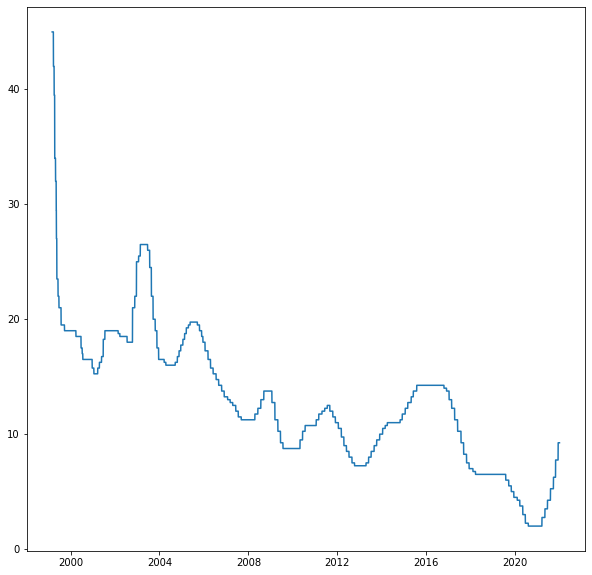

In [58]:
# Dados da Selic
# criando objeto selic

selic  =  quandl.get('BCB/432', start ='2000-01-01', end_date='2021-12-31')

# criando uma figura do tamanho 10x10

plt.figure(figsize=(10,10))
# plotar
plt.plot(selic)
# visualizar o gráfico
plt.show()


# erro devido a falta de confirmação do endereço no e-mail 

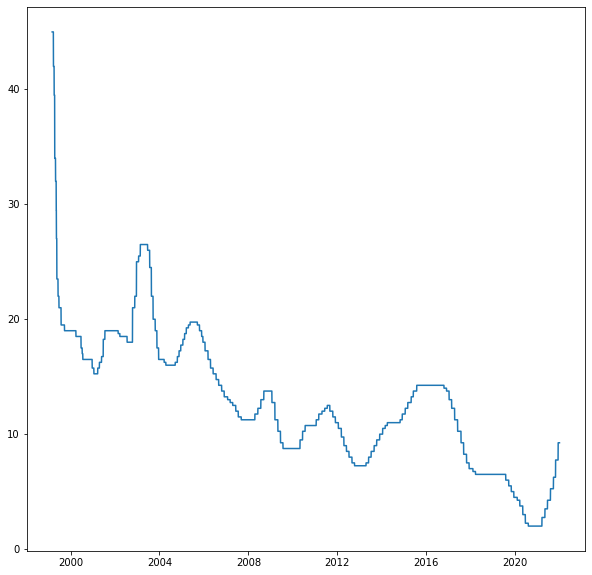

In [59]:
# Dados da Selic
# criando objeto selic

selic  =  quandl.get('BCB/432', start ='2000-01-01', end_date='2021-12-31')

# criando uma figura do tamanho 10x10

plt.figure(figsize=(10,10))
# plotar
plt.plot(selic)
# visualizar o gráfico
plt.show()




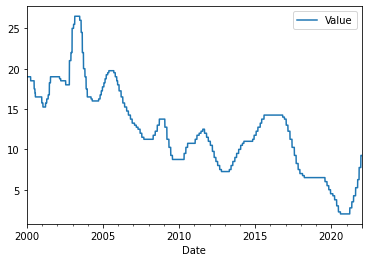

In [60]:
# Outra forma de apresentar o gráfico da Selic

quandl.get('BCB/432', start_date='2000-01-01', end_date='2021-12-31').plot();

In [61]:
selic


,Value
Date,
1999-03-05,45.00
1999-03-06,45.00
1999-03-07,45.00
1999-03-08,45.00
1999-03-09,45.00
...,...
2021-12-27,9.25
2021-12-28,9.25
2021-12-29,9.25


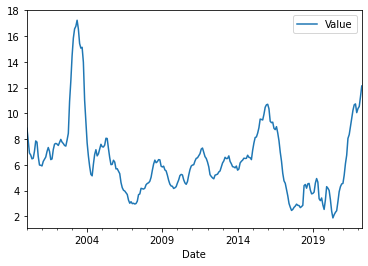

In [62]:
# IPCA

ipca = quandl.get('BCB/13522', start_date='2000-01-01')
ipca.plot();

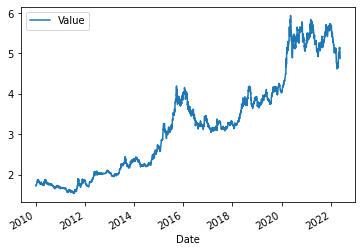

In [63]:
# Dolar 

dolar = quandl.get('BCB/10813', start_date='2010-01-01')
dolar.plot();

In [64]:
dolar

,Value
Date,
2010-01-04,1.7232
2010-01-05,1.7219
2010-01-06,1.7329
2010-01-07,1.7405
2010-01-08,1.7382
...,...
2022-05-16,5.0660
2022-05-17,4.9670
2022-05-18,4.9586


In [65]:
# CDI

cdi = quandl.get("BCB/4392", start_date='2010-01-01')

In [66]:
cdi

,Value
Date,
2010-01-31,8.62
2010-02-28,8.62
2010-03-31,8.61
2010-04-30,8.70
2010-05-31,9.38
...,...
2022-01-31,9.15
2022-02-28,10.49
2022-03-31,11.15


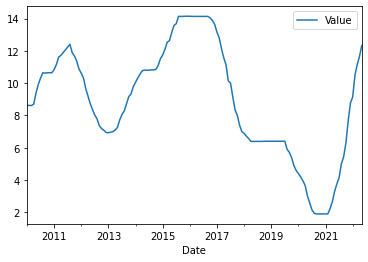

In [67]:
cdi.plot();

In [68]:
# IGPM 

igpm = quandl.get('BCB/189', start_date='2010-01-01')

In [69]:
igpm

,Value
Date,
2010-01-31,0.63
2010-02-28,1.18
2010-03-31,0.94
2010-04-30,0.77
2010-05-31,1.19
...,...
2021-12-31,0.87
2022-01-31,1.82
2022-02-28,1.83


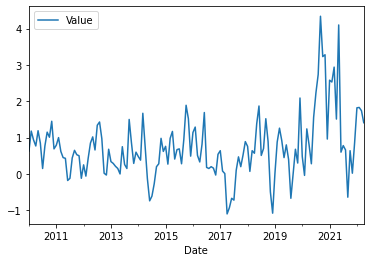

In [70]:
igpm.plot();

In [71]:
# INCC - custo da construção

incc = quandl.get('BCB/7458', start_date='2010-01-01')

In [72]:
incc

,Value
Date,
2010-01-31,0.40
2010-02-28,0.39
2010-03-31,0.37
2010-04-30,1.25
2010-05-31,0.66
...,...
2021-12-31,0.30
2022-01-31,0.57
2022-02-28,0.44


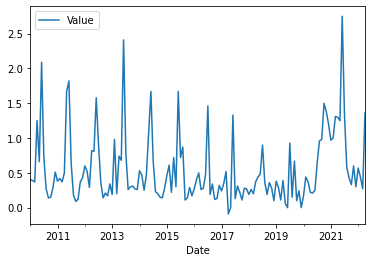

In [73]:
incc.plot();

In [74]:
# Salário Mínimo

salario_minimo = quandl.get('BCB/1619', start_date='2010-01-01')

In [75]:
salario_minimo

,Value
Date,
2010-01-31,510.0
2010-02-28,510.0
2010-03-31,510.0
2010-04-30,510.0
2010-05-31,510.0
...,...
2021-11-30,1100.0
2021-12-31,1100.0
2022-01-31,1212.0


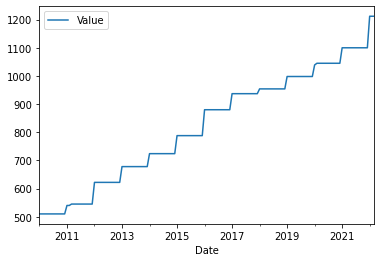

In [76]:
salario_minimo.plot();

In [77]:
# Reservas Internacionais

reservas = quandl.get("BCB/13982", start_date='2010-01-01')

In [78]:
reservas

,Value
Date,
2010-01-04,239637.0
2010-01-05,239733.0
2010-01-06,239847.0
2010-01-07,239811.0
2010-01-08,240623.0
...,...
2022-04-19,347946.0
2022-04-20,348268.0
2022-04-22,346610.0


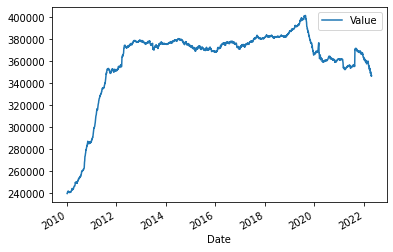

In [79]:
reservas.plot();

In [80]:
# PIB em dólares

pib_brasil = quandl.get('ODA/BRA_NGDPD', start_date='2010-01-01')

In [81]:
pib_brasil

,Value
Date,
2010-12-31,2207.62
2011-12-31,2613.99
2012-12-31,2464.40
2013-12-31,2471.56
2014-12-31,2456.17
2015-12-31,1800.03
2016-12-31,1795.60
2017-12-31,2053.21
2018-12-31,1868.18


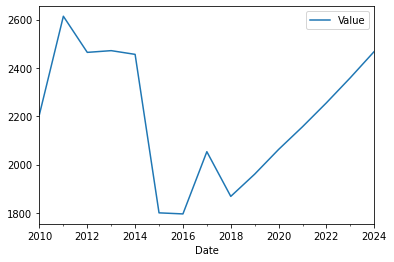

In [82]:
pib_brasil.plot();

In [83]:
# Indicadores Internacionais

inflacao_usa = quandl.get('RATEINF/CPI_USA', start_date='2010-01-01')

In [84]:
inflacao_usa

,Value
Date,
2010-01-31,216.687
2010-02-28,216.741
2010-03-31,217.631
2010-04-30,218.009
2010-05-31,218.178
...,...
2021-12-31,278.802
2022-01-31,281.148
2022-02-28,283.716


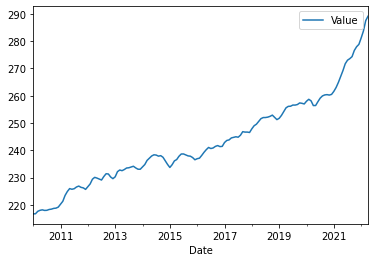

In [85]:
inflacao_usa.plot();

In [86]:
# inflação Zona do Euro

inflacao_euro = quandl.get('RATEINF/CPI_EUR', start_date='2010-01-01')

In [87]:
inflacao_euro

,Value
Date,
2010-01-31,91.71
2010-02-28,92.00
2010-03-31,93.02
2010-04-30,93.40
2010-05-31,93.50
...,...
2021-12-31,110.37
2022-01-31,110.70
2022-02-28,111.74


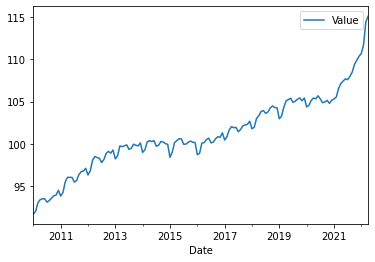

In [88]:
inflacao_euro.plot();

In [89]:
# inflação na Alemanha 

inflacao_alemanha = quandl.get("RATEINF/CPI_DEU", start_date="2010-01-01")

In [90]:
inflacao_alemanha

,Value
Date,
2010-01-31,92.3
2010-02-28,92.7
2010-03-31,93.2
2010-04-30,93.2
2010-05-31,93.2
...,...
2021-12-31,111.1
2022-01-31,111.5
2022-02-28,112.5


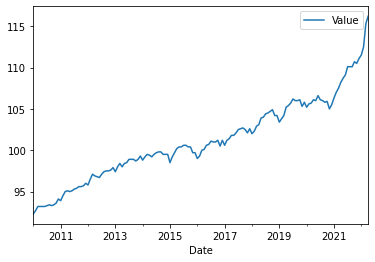

In [91]:
inflacao_alemanha.plot();


In [92]:
# Inflação no Japão 

inflacao_japao = quandl.get('RATEINF/CPI_JPN', start_date='2010-01-01')

In [93]:
inflacao_japao

,Value
Date,
2010-01-31,94.9
2010-02-28,94.9
2010-03-31,95.1
2010-04-30,95.1
2010-05-31,95.1
...,...
2021-12-31,100.1
2022-01-31,100.3
2022-02-28,100.7


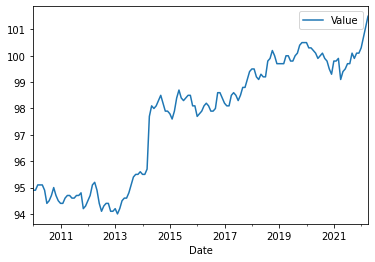

In [94]:
inflacao_japao.plot();

In [95]:
# Bitcoin Market Price USD

bitcoin = quandl.get('BCHAIN/MKPRU', start_date='2010-01-01')

In [96]:
bitcoin

,Value
Date,
2010-01-01,0.00
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-05,0.00
...,...
2022-05-17,29834.09
2022-05-18,30406.69
2022-05-19,28680.97


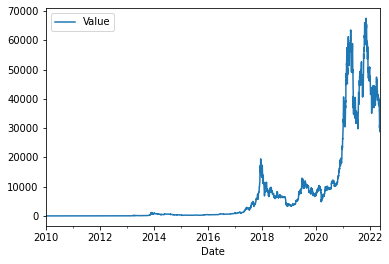

In [97]:
bitcoin.plot();

In [98]:
# Bitcoin USD Exchange Trade Volume

bitcoin_volume = quandl.get("BCHAIN/TRVOU", start_date='2010-01-01')

In [99]:
bitcoin_volume

,Value
Date,
2010-01-01,0.000000e+00
2010-01-02,0.000000e+00
2010-01-03,0.000000e+00
2010-01-04,0.000000e+00
2010-01-05,0.000000e+00
...,...
2022-05-17,2.556259e+08
2022-05-18,1.990562e+08
2022-05-19,2.389268e+08


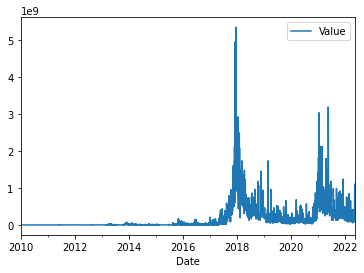

In [100]:
bitcoin_volume.plot();

In [101]:
# Bitcoin Miner Revenue - como estão sendo remunerado os mineradores

bitcoin_mineracao = quandl.get("BCHAIN/MIREV", start_date =' 2010-01-01')

In [102]:
bitcoin_mineracao

,Value
Date,
2010-01-01,0.000000e+00
2010-01-02,0.000000e+00
2010-01-03,0.000000e+00
2010-01-04,0.000000e+00
2010-01-05,0.000000e+00
...,...
2022-05-16,3.177267e+07
2022-05-17,2.839788e+07
2022-05-18,2.530689e+07


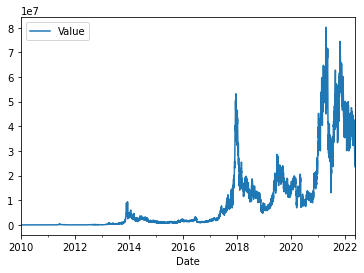

In [103]:
bitcoin_mineracao.plot();

# 5. Dados estruturados e desestruturados

In [104]:
# Exemplo dados estruturados

#ibov.head()
lren.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,18.775900,19.013674,18.702108,18.972677,17.484581,676417
2017-01-03,19.103865,19.677799,18.808697,19.554813,18.021063,2976064
2017-01-04,19.636805,19.833582,19.177654,19.382631,17.862389,2671030
2017-01-05,19.464622,19.587610,19.161257,19.202253,17.696156,3587596
2017-01-06,19.202253,19.202253,18.808697,18.980877,17.492142,2139141


In [105]:
# Exemplo de dado desestruturado

from IPython.display import Image   # importa a partir de uma url

Image(url="https://upload.wikimedia.org/wikipedia/commons/a/ad/Lozingle_10032014.jpg")

# 6. Variáveis quantitativas e qualitativas

In [ ]:
#abcb.dtypes  
# variáveis quantitativas
ibov.dtypes

Date      object
ABCB4    float64
BBAS3    float64
BBDC4    float64
BPAN4    float64
BTOW3    float64
CGAS3    float64
CMIG4    float64
CSNA3    float64
CYRE3    float64
ELET3    float64
ELPL4    float64
ENBR3    float64
EQTL3    float64
EZTC3    float64
FIBR3    float64
GOAU4    float64
HGTX3    float64
ITUB4    float64
LAME4    float64
LREN3    float64
MRVE3    float64
MYPK3    float64
PETR4    float64
POMO4    float64
QGEP3    float64
RAPT4    float64
SAPR4    float64
SBSP3    float64
SUZB5    float64
TUPY3    float64
USIM5    float64
VALE5    float64
WEGE3    float64
dtype: object

In [ ]:
# mudar o formato dos dados do dataframe
# metodo 'melt ' transforma tudo que é coluna em linha
cotacoes_ativos_long = pd.melt(ibov, ignore_index=False)

cotacoes_ativos_long

,variable,value
0,Date,6/5/2012
1,Date,6/6/2012
2,Date,6/8/2012
3,Date,6/11/2012
4,Date,6/12/2012
...,...,...
1252,WEGE3,17.360371
1253,WEGE3,17.440098
1254,WEGE3,17.639414
1255,WEGE3,17.950001


In [ ]:
cotacoes_ativos_long.dtypes

variable    object
value       object
dtype: object

In [ ]:
# Separamos as categorias únicas dentro do df cotacoes_ativos_long
set(cotacoes_ativos_long.variable)

{'ABCB4',
 'BBAS3',
 'BBDC4',
 'BPAN4',
 'BTOW3',
 'CGAS3',
 'CMIG4',
 'CSNA3',
 'CYRE3',
 'Date',
 'ELET3',
 'ELPL4',
 'ENBR3',
 'EQTL3',
 'EZTC3',
 'FIBR3',
 'GOAU4',
 'HGTX3',
 'ITUB4',
 'LAME4',
 'LREN3',
 'MRVE3',
 'MYPK3',
 'PETR4',
 'POMO4',
 'QGEP3',
 'RAPT4',
 'SAPR4',
 'SBSP3',
 'SUZB5',
 'TUPY3',
 'USIM5',
 'VALE5',
 'WEGE3'}